In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, jaccard_score, classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# --- Step 1: Data Loading and Initial Exploration ---
print("--- Step 1: Loading Data ---")
try:
    df = pd.read_csv('C:\\Users\Admin\Downloads\Dataset .csv')
    print("Dataset loaded successfully.")
    print(f"Initial dataset shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'Dataset .csv' not found. Please ensure the file is in the correct directory.")
    exit()

--- Step 1: Loading Data ---
Dataset loaded successfully.
Initial dataset shape: (9551, 21)


In [4]:
# --- Step 2: Data Preprocessing ---
print("\n--- Step 2: Preprocessing Data ---")
# Handle missing values in the target variable 'Cuisines'
initial_rows = len(df)
df.dropna(subset=['Cuisines'], inplace=True)
print(f"Removed {initial_rows - len(df)} rows with missing 'Cuisines' values.")
# Encode binary categorical features
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
print("Encoded 'Has Table booking' and 'Has Online delivery' to binary format.")


--- Step 2: Preprocessing Data ---
Removed 0 rows with missing 'Cuisines' values.
Encoded 'Has Table booking' and 'Has Online delivery' to binary format.


In [5]:
# --- Step 3: Feature Engineering (Target Variable) ---
print("\n--- Step 3: Engineering the Target Variable ---")
# Use MultiLabelBinarizer to transform the 'Cuisines' column
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Cuisines'].str.split(', '))
print(f"Transformed 'Cuisines' column into a multi-label binary format with {y.shape[1]} unique cuisines.")



--- Step 3: Engineering the Target Variable ---
Transformed 'Cuisines' column into a multi-label binary format with 145 unique cuisines.


In [6]:
# --- Step 4: Feature Selection & Data Splitting ---
print("\n--- Step 4: Selecting Features and Splitting Data ---")
# Select features for the model
features = ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes', 'Has Table booking', 'Has Online delivery']
X = df[features]

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples) sets.")


--- Step 4: Selecting Features and Splitting Data ---
Data split into training (7633 samples) and testing (1909 samples) sets.


In [7]:
# --- Step 5: Model Training and Evaluation ---
print("\n--- Step 5: Training and Evaluating Models ---")
# Define the models to be trained using the One-vs-Rest strategy
models = {
    "Binary Relevance - Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42)),
    "Binary Relevance - Random Forest": OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate a suite of multi-label metrics
    subset_accuracy = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred, average='samples', zero_division=0)
    micro_f1 = f1_score(y_test, y_pred, average='micro', zero_division=0)
    macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results[name] = {
        "Subset Accuracy": subset_accuracy,
        "Hamming Loss": hamming,
        "Jaccard Score": jaccard,
        "Micro F1": micro_f1,
        "Macro F1": macro_f1,
        "Weighted F1": weighted_f1,
        "y_pred": y_pred
    }

    print(f"--- Evaluation Results for {name} ---")
    print(f"Subset Accuracy (Exact Match Ratio): {subset_accuracy:.4f}")
    print(f"Hamming Loss (Fraction of incorrect labels): {hamming:.4f}")
    print(f"Jaccard Score (Avg. similarity): {jaccard:.4f}")
    print(f"Micro F1-score (Aggregated): {micro_f1:.4f}")
    print(f"Macro F1-score (Unweighted Avg.): {macro_f1:.4f}")
    print(f"Weighted F1-score (Weighted Avg.): {weighted_f1:.4f}")


--- Step 5: Training and Evaluating Models ---

--- Training Binary Relevance - Logistic Regression ---


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\multiclass.py:77: UserWarning: Label not 26 is present in all training examples.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\multiclass.py:77: UserWarning: Label not 105 is present in all training examples.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\multiclass.py:77: UserWarning: Label not 107 is present in all training examples.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn

--- Evaluation Results for Binary Relevance - Logistic Regression ---
Subset Accuracy (Exact Match Ratio): 0.0010
Hamming Loss (Fraction of incorrect labels): 0.0145
Jaccard Score (Avg. similarity): 0.0057
Micro F1-score (Aggregated): 0.0152
Macro F1-score (Unweighted Avg.): 0.0016
Weighted F1-score (Weighted Avg.): 0.0146

--- Training Binary Relevance - Random Forest ---


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\multiclass.py:77: UserWarning: Label not 26 is present in all training examples.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\multiclass.py:77: UserWarning: Label not 105 is present in all training examples.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\multiclass.py:77: UserWarning: Label not 107 is present in all training examples.
  warnings.warn(


--- Evaluation Results for Binary Relevance - Random Forest ---
Subset Accuracy (Exact Match Ratio): 0.0681
Hamming Loss (Fraction of incorrect labels): 0.0153
Jaccard Score (Avg. similarity): 0.1807
Micro F1-score (Aggregated): 0.2945
Macro F1-score (Unweighted Avg.): 0.0436
Weighted F1-score (Weighted Avg.): 0.2622


In [8]:
# --- Step 6: Performance Analysis and Bias Identification ---
print("\n--- Step 6: Analyzing Performance, Challenges, and Biases ---")
# Identify the best model based on a balance of metrics (Jaccard and Weighted F1)
best_model_name = max(results, key=lambda name: results[name]['Jaccard Score'])
print(f"\nBest performing model identified: {best_model_name}")

y_pred_best = results[best_model_name]['y_pred']

# 6.1: Per-Cuisine Performance Breakdown
print("\n--- Per-Cuisine Performance Analysis (Top 20 by Support) ---")
print("This table reveals the model's performance on individual cuisines.")
print("Observe the significant drop in F1-score as the support (number of instances) decreases.")
report_dict = classification_report(y_test, y_pred_best, target_names=mlb.classes_, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df[~report_df.index.isin(['micro avg', 'macro avg', 'weighted avg', 'samples avg'])]
report_df = report_df.sort_values(by='support', ascending=False)
print(report_df.head(20).to_string())


--- Step 6: Analyzing Performance, Challenges, and Biases ---

Best performing model identified: Binary Relevance - Random Forest

--- Per-Cuisine Performance Analysis (Top 20 by Support) ---
This table reveals the model's performance on individual cuisines.
Observe the significant drop in F1-score as the support (number of instances) decreases.
              precision    recall  f1-score  support
North Indian   0.581208  0.532595  0.555841    813.0
Chinese        0.491979  0.323374  0.390244    569.0
Fast Food      0.481865  0.210884  0.293375    441.0
Mughlai        0.236842  0.081081  0.120805    222.0
Italian        0.393443  0.150000  0.217195    160.0
Cafe           0.263889  0.139706  0.182692    136.0
Continental    0.317073  0.191176  0.238532    136.0
Bakery         0.083333  0.022222  0.035088    135.0
Desserts       0.170732  0.055556  0.083832    126.0
South Indian   0.156250  0.042735  0.067114    117.0
Street Food    0.277778  0.088496  0.134228    113.0
Pizza          


--- Visualizing Bias with Confusion Matrices ---
Generated confusion matrix for 'North Indian' and saved as 'confusion_matrix_North_Indian.png'


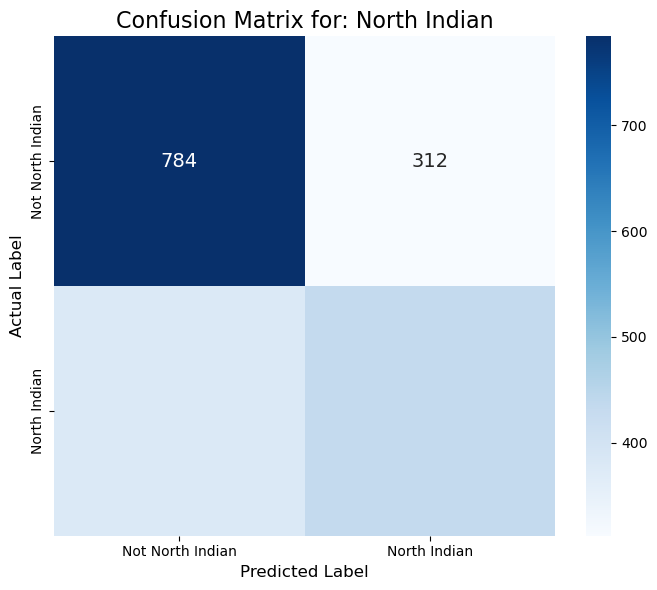

Generated confusion matrix for 'Seafood' and saved as 'confusion_matrix_Seafood.png'


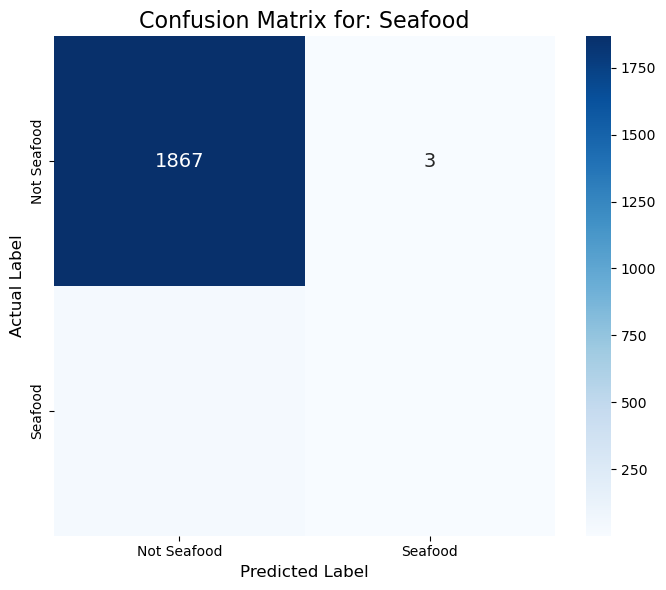


--- Analysis Complete ---


In [9]:
# 6.2: Visualizing Bias with Confusion Matrices
print("\n--- Visualizing Bias with Confusion Matrices ---")
def plot_confusion_matrix_analysis(cuisine_name, y_true, y_pred, classes):
    """Generates and displays a confusion matrix plot for a specific cuisine."""
    try:
        class_index = list(classes).index(cuisine_name)
        cm = confusion_matrix(y_true[:, class_index], y_pred[:, class_index])

        plt.figure(figsize=(7, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[f'Not {cuisine_name}', cuisine_name],
                    yticklabels=[f'Not {cuisine_name}', cuisine_name],
                    annot_kws={"size": 14})
        plt.title(f'Confusion Matrix for: {cuisine_name}', fontsize=16)
        plt.ylabel('Actual Label', fontsize=12)
        plt.xlabel('Predicted Label', fontsize=12)
        plt.tight_layout()
        
        # Save the figure to a file (optional, you can keep this)
        filename = f'confusion_matrix_{cuisine_name.replace(" ", "_")}.png'
        plt.savefig(filename)
        print(f"Generated confusion matrix for '{cuisine_name}' and saved as '{filename}'")

        # --- FIX: Use plt.show() to display the plot in the notebook ---
        plt.show() 
        
    except ValueError:
        print(f"Could not generate confusion matrix for '{cuisine_name}' as it might not be in the test set.")

# Generate plots for a high-support and a low-support cuisine to highlight bias
plot_confusion_matrix_analysis('North Indian', y_test, y_pred_best, mlb.classes_)
plot_confusion_matrix_analysis('Seafood', y_test, y_pred_best, mlb.classes_)

print("\n--- Analysis Complete ---")